In [1]:
%matplotlib inline

### Load the training data

In [2]:
from load_shamnet4_traindata import load_shamnet4_traindata

traindata = load_shamnet4_traindata('shamnet4_traindata.h5')
smf_all_batches, shmf_all_batches, scatter_all_batches, smhm_all_batches = traindata

### Compare predicted to target SMF for a particular point in the training data

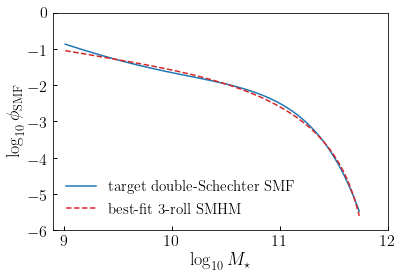

In [5]:
from shamnet.shamnet4_traindata import _predict_no_scatter_smf, _add_scatter_to_true_smf, _double_schechter
from shamnet.shamnet4_traindata import LOGMH_TABLE as logmh_table, SMF_LOGSM_BINS as logsm_bins
logsm_binmids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

i = np.random.randint(0, smhm_all_batches.shape[0])
smf_params = smf_all_batches[i, :]
shmf_params = shmf_all_batches[i, :]
scatter_params = scatter_all_batches[i]
smhm_params = smhm_all_batches[i, :]

logsm_bf, nd_true_bf, dlogsm_bf = _predict_no_scatter_smf(smhm_params, shmf_params, logmh_table)

nd_noisy_bf = _add_scatter_to_true_smf(nd_true_bf, logsm_bf, dlogsm_bf, scatter_params, logsm_bins)

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(8.9, 12)
ylim = ax.set_ylim(-6, 0)
logsm_bin_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])
smf_target = _double_schechter(logsm_bin_mids, *smf_params)
__=ax.plot(logsm_binmids, np.log10(smf_target), color=mblue, 
           label=r'${\rm target\ double}$-${\rm Schechter\ SMF}$')

__=ax.plot(logsm_binmids, np.log10(nd_noisy_bf), '--', color=mred, 
           label=r'${\rm best}$-${\rm fit\ 3}$-${\rm roll\ SMHM}$')


xlabel = ax.set_xlabel(r'${\log_{10} M_{\star}}$')
ylabel = ax.set_ylabel(r'${\log_{10} \phi_{\rm SMF}}$')
leg = ax.legend()

fig.savefig('check_traindata.png', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)


### Grab a subset of the training data and call the batch likelihood function 

In [6]:
from shamnet.shamnet4_traindata import log_smhm_likelihood_batch

istart, iend = 100, 200
smf_params = smf_all_batches[istart:iend, :]
shmf_params = shmf_all_batches[istart:iend, :]
scatter_params = scatter_all_batches[istart:iend]
smhm_params = smhm_all_batches[istart:iend, :]

log_smhm_likelihood_batch(smhm_params, smf_params, shmf_params, scatter_params, logmh_table, logsm_bins)

DeviceArray(0.00532927, dtype=float32)